In [2]:
# Importamos los modulos necesarios para la libreta
import pandas as pd #Importamos el modulo pandas
import os #Importamos el modulo os
import geopandas as gpd #Importamos el modulo geopandas
from shapely.geometry import Point #Importamos el metodo Point del modulo shapely 

In [4]:
# Encontramos el ruta del directorio raw
directorio = os.path.dirname(os.getcwd()) + '/data/raw/'

In [7]:
hermosillo = gpd.read_file(directorio + '260300001a.shp')
hermosillo = hermosillo[['CVEGEO','geometry']]
hermosillo['CVEGEO'] = hermosillo['CVEGEO'].str[-4:]
hermosillo.crs

<Projected CRS: PROJCS["ccl_itrf92",GEOGCS["ITRF_1992",DATUM["Inte ...>
Name: ccl_itrf92
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Lambert Conic Conformal (2SP)
Datum: International Terrestrial Reference Frame 1992
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [24]:
hmo_ec_2020 = pd.read_csv(directorio + 'conjunto_de_datos_ageb_urbana_26_cpv2020.csv')
hmo_ec_2020 = hmo_ec_2020[(hmo_ec_2020['LOC']==1) & (hmo_ec_2020['MUN']==30)]
hmo_ec_2020 = hmo_ec_2020[hmo_ec_2020['POBTOT'] != 0]
hmo_ec_2020.head()

,ENTIDAD,NOM_ENT,MUN,NOM_MUN,LOC,NOM_LOC,AGEB,MZA,POBTOT,POBFEM,...,VPH_TELEF,VPH_CEL,VPH_INTER,VPH_STVP,VPH_SPMVPI,VPH_CVJ,VPH_SINRTV,VPH_SINLTC,VPH_SINCINT,VPH_SINTIC
26086,26,Sonora,30,Hermosillo,1,Total de la localidad urbana,0000,0,855563,431621,...,93102,246615,189653,136543,90744,52642,6240,7586,57021,1509
26100,26,Sonora,30,Hermosillo,1,Total AGEB urbana,0076,0,4,*,...,*,*,*,*,*,*,*,*,*,*
26101,26,Sonora,30,Hermosillo,1,Hermosillo,0076,1,4,*,...,*,*,*,*,*,*,*,*,*,*
26102,26,Sonora,30,Hermosillo,1,Total AGEB urbana,0080,0,685,349,...,11,188,58,87,17,18,6,9,118,3
26103,26,Sonora,30,Hermosillo,1,Hermosillo,0080,1,118,62,...,*,30,12,12,5,5,*,3,18,*


In [37]:
print(str(hmo_ec_2020.dtypes.to_list()[0]))
print(hmo_ec_2020.columns.to_list())

int64
['ENTIDAD', 'NOM_ENT', 'MUN', 'NOM_MUN', 'LOC', 'NOM_LOC', 'AGEB', 'MZA', 'POBTOT', 'POBFEM', 'POBMAS', 'P_0A2', 'P_0A2_F', 'P_0A2_M', 'P_3YMAS', 'P_3YMAS_F', 'P_3YMAS_M', 'P_5YMAS', 'P_5YMAS_F', 'P_5YMAS_M', 'P_12YMAS', 'P_12YMAS_F', 'P_12YMAS_M', 'P_15YMAS', 'P_15YMAS_F', 'P_15YMAS_M', 'P_18YMAS', 'P_18YMAS_F', 'P_18YMAS_M', 'P_3A5', 'P_3A5_F', 'P_3A5_M', 'P_6A11', 'P_6A11_F', 'P_6A11_M', 'P_8A14', 'P_8A14_F', 'P_8A14_M', 'P_12A14', 'P_12A14_F', 'P_12A14_M', 'P_15A17', 'P_15A17_F', 'P_15A17_M', 'P_18A24', 'P_18A24_F', 'P_18A24_M', 'P_15A49_F', 'P_60YMAS', 'P_60YMAS_F', 'P_60YMAS_M', 'REL_H_M', 'POB0_14', 'POB15_64', 'POB65_MAS', 'PROM_HNV', 'PNACENT', 'PNACENT_F', 'PNACENT_M', 'PNACOE', 'PNACOE_F', 'PNACOE_M', 'PRES2015', 'PRES2015_F', 'PRES2015_M', 'PRESOE15', 'PRESOE15_F', 'PRESOE15_M', 'P3YM_HLI', 'P3YM_HLI_F', 'P3YM_HLI_M', 'P3HLINHE', 'P3HLINHE_F', 'P3HLINHE_M', 'P3HLI_HE', 'P3HLI_HE_F', 'P3HLI_HE_M', 'P5_HLI', 'P5_HLI_NHE', 'P5_HLI_HE', 'PHOG_IND', 'POB_AFRO', 'POB_AFRO_F

In [11]:
hermosillo = hermosillo.to_crs(epsg=4326)
baches = gpd.read_file(directorio + 'baches_hmo_2021_2024.csv')
baches['geometry'] = baches.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1)
baches = gpd.GeoDataFrame(baches, geometry='geometry')
baches.set_crs(epsg=4326, inplace=True)  
baches = gpd.sjoin(baches, hermosillo, how='left', predicate='within')
baches = baches[['latitude', 'longitude','CVEGEO', 'date', 'neighborhoods', 'description', 'geometry']]
baches['date'] = pd.to_datetime(baches['date'])
baches['latitude'] = pd.to_numeric(baches['latitude'])
baches['longitude'] = pd.to_numeric(baches['longitude'])
baches.head()

,latitude,longitude,CVEGEO,date,neighborhoods,description,geometry
0,29.094161,-110.969471,1996,2021-10-18,[551],"Hay un bache en la calle, y los carros se golp...",POINT (-110.96947 29.09416)
1,29.124060,-110.971318,1746,2021-10-19,[601],"Buen dia! Para reportar pavimento dañado, bach...",POINT (-110.97132 29.12406)
2,29.123985,-110.971286,1746,2021-10-19,[601],"Buen dia! Para reportar pavimento dañado, bach...",POINT (-110.97129 29.12399)
3,29.128777,-110.953926,5043,2021-10-21,[49],toda la calle desde el blvd Morelos tiene vari...,POINT (-110.95393 29.12878)
4,29.083809,-111.042101,2617,2021-10-04,[74],C. SOLICITA BACHEO ASEGURA REPORTANTE QUE ES P...,POINT (-111.0421 29.08381)


<Axes: >

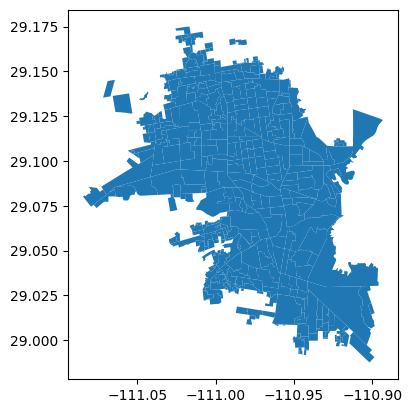

In [30]:
hermosillo.plot()